In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series  # for convenience
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from scipy import stats  
from matplotlib import cm
import math
from scipy.misc import imsave
from scipy.misc import imread
import re
import glob, os
shot = 232
picL = 18333
picR = 18158

#totalframe = 4744 #Shot119
#totalframe = 3865 #Shot118
#totalframe = 2098 #Shot120
#totalframe = 4739 #Shot216
#totalframe = 6799 #Shot229
totalframe = 6773 #Shot232

v0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum.tif'.format(shot,shot,picL))
v0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR_sum.tif'.format(shot,shot,picR))
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))

Freq = 100.*1000.
DeltaT = 1/Freq
def Parabola(x,a,b,c):
    y = a+b*x+c*x**2
    return y
FitList = []
fig = plt.figure(figsize = (12,12))  
'''
for counter, file in enumerate(glob.glob("./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair*.csv".format(shot,shot))):    
    df = pd.read_csv(file)
    f1 = file.split('/')
    f2 = f1[4].split('.csv') 
    f3 = f2[0].split("3DErrEpilineCheckPinghanShot{}Pair".format(shot))
    index = f3[1]
    f4 = index.split('_')
    itL = int(f4[0])
    itR = int(f4[1])
    Track2D = pd.read_csv('./Data/Shot{}/TrackPair/Pair_{}.csv'.format(shot,index))
    Track2D = Track2D[:-1]
    #Track3D = pd.concat([df, Track2D['Frame']], axis=1)
    #Track3D['Time']=Track3D['Frame']*DeltaT
    Track2D['InvFrame']=totalframe-Track2D['Frame']
    Track3D = pd.concat([df, Track2D['InvFrame']], axis=1)
    Track3D['Time']=Track3D['InvFrame']*DeltaT
    XL=Track3D['Left xx']
    YL=Track3D['Left yy']
    XR=Track3D['Right xx']
    YR=Track3D['Right yy']
    X=Track3D['3Dxx']
    Y=Track3D['3Dyy']
    Z=Track3D['3Dzz']
    T=Track3D['Time']   
    params_x, pcov_x = curve_fit(Parabola, T, X)
    params_y, pcov_y = curve_fit(Parabola, T, Y)
    params_z, pcov_z = curve_fit(Parabola, T, Z)
    #para_list = np.concatenate((params_x,params_y,params_z), axis=0)
    #para_list = [itL,itR,params_x[0],params_x[1],params_x[2],params_y[0],params_y[1],params_y[2],params_z[0],params_z[1],params_z[2],
    #             pcov_x[0][0],pcov_x[0][1],pcov_x[0][2], pcov_x[1][0],pcov_x[1][1],pcov_x[1][2],pcov_x[2][0],pcov_x[2][1],pcov_x[2][2],
    #             pcov_y[0][0],pcov_y[0][1],pcov_y[0][2], pcov_y[1][0],pcov_y[1][1],pcov_y[1][2],pcov_y[2][0],pcov_y[2][1],pcov_y[2][2],
    #             pcov_z[0][0],pcov_z[0][1],pcov_z[0][2], pcov_z[1][0],pcov_z[1][1],pcov_z[1][2],pcov_z[2][0],pcov_z[2][1],pcov_z[2][2]]
    #FitList.append(para_list)

    fit_X = Parabola(T, params_x[0], params_x[1],params_x[2])
    fit_Y = Parabola(T, params_y[0], params_y[1],params_y[2])
    fit_Z = Parabola(T, params_z[0], params_z[1],params_z[2])
    
    fig = plt.figure(figsize = (12,12))  # make a new figure
        #f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2) 
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.scatter(T,X,color='r',marker=".",s=1)
    ax1.plot(T,fit_X)
    ax1.set_xlabel('T (s)', fontsize=30,labelpad=15)
    ax1.set_ylabel('X (m)', fontsize=40,labelpad=20)
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.scatter(T,Y,color='r',marker=".",s=1)
    ax2.plot(T,fit_Y)
    ax2.set_xlabel('T (s)', fontsize=30,labelpad=15)
    ax2.set_ylabel('Y (m)', fontsize=40,labelpad=20)
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.scatter(T,Z,color='r',marker=".",s=1)
    ax3.plot(T,fit_Z)
    ax3.set_xlabel('T (s)', fontsize=30,labelpad=15)
    ax3.set_ylabel('Z (m)', fontsize=40,labelpad=20)
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax4.view_init(10, -30)
    ax4.set_xlabel('X (m)', fontsize=40,labelpad=20)
    ax4.set_ylabel('Y (m)', fontsize=40,labelpad=20)
    ax4.set_zlabel('Z (m)', fontsize=40,labelpad=20)      
    ax4.plot(X, Y, Z)
    plt.savefig("./Data/Shot{}/3D/3DFit_{}_{}.pdf".format(shot,shot,index))
    plt.show()
'''

'\nfor counter, file in enumerate(glob.glob("./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair*.csv".format(shot,shot))):    \n    df = pd.read_csv(file)\n    f1 = file.split(\'/\')\n    f2 = f1[4].split(\'.csv\') \n    f3 = f2[0].split("3DErrEpilineCheckPinghanShot{}Pair".format(shot))\n    index = f3[1]\n    f4 = index.split(\'_\')\n    itL = int(f4[0])\n    itR = int(f4[1])\n    Track2D = pd.read_csv(\'./Data/Shot{}/TrackPair/Pair_{}.csv\'.format(shot,index))\n    Track2D = Track2D[:-1]\n    #Track3D = pd.concat([df, Track2D[\'Frame\']], axis=1)\n    #Track3D[\'Time\']=Track3D[\'Frame\']*DeltaT\n    Track2D[\'InvFrame\']=totalframe-Track2D[\'Frame\']\n    Track3D = pd.concat([df, Track2D[\'InvFrame\']], axis=1)\n    Track3D[\'Time\']=Track3D[\'InvFrame\']*DeltaT\n    XL=Track3D[\'Left xx\']\n    YL=Track3D[\'Left yy\']\n    XR=Track3D[\'Right xx\']\n    YR=Track3D[\'Right yy\']\n    X=Track3D[\'3Dxx\']\n    Y=Track3D[\'3Dyy\']\n    Z=Track3D[\'3Dzz\']\n    T=Track3D[\'Time\']   \n

(0, 0)
(1855, 4024)
(2343, 3385)
(2343, 4551)
(2943, 2287)
(2988, 1915)
(2998, 1561)
(2998, 4405)
(3106, 2673)
(3760, 3265)
(3760, 4061)
(3871, 1937)
(3886, 2778)
(4341, 4018)
(4613, 3290)
(4899, 3296)
(4914, 3308)
(4914, 4846)
(4918, 4259)
(4919, 3312)
(4928, 4448)
(4929, 916)
(4946, 3384)
(4972, 3337)
(4972, 4148)
(4972, 4352)
(4979, 3389)
(4987, 3382)
(5011, 4363)
(5011, 4500)
(5019, 4480)
(5028, 3406)
(5028, 4087)
(5031, 3322)
(5035, 3775)
(5058, 3587)
(5087, 3497)
(5150, 3591)
(5395, 3943)
(5422, 3613)
(5427, 3791)
(5457, 4289)
(5493, 3242)
(5510, 3870)
(5511, 3983)
(5519, 3737)
(5521, 3871)
(5562, 3791)
(5570, 3622)
(5576, 3890)
(5607, 3451)
(5636, 4159)
(5636, 4726)
(5788, 4019)
(5844, 4084)
(5844, 4381)
(5875, 4085)
(5883, 4070)
(5884, 3879)
(5884, 4663)
(5887, 5137)
(5894, 4120)
(5903, 4152)
(5920, 4168)
(5924, 4154)
(5936, 4230)
(5952, 4250)
(6025, 4176)
(6052, 4515)
(6053, 4166)
(6092, 4663)
(6106, 4131)
(6116, 4244)
(6119, 4269)
(6121, 4571)
(6123, 3983)
(6128, 4149)
(6129,

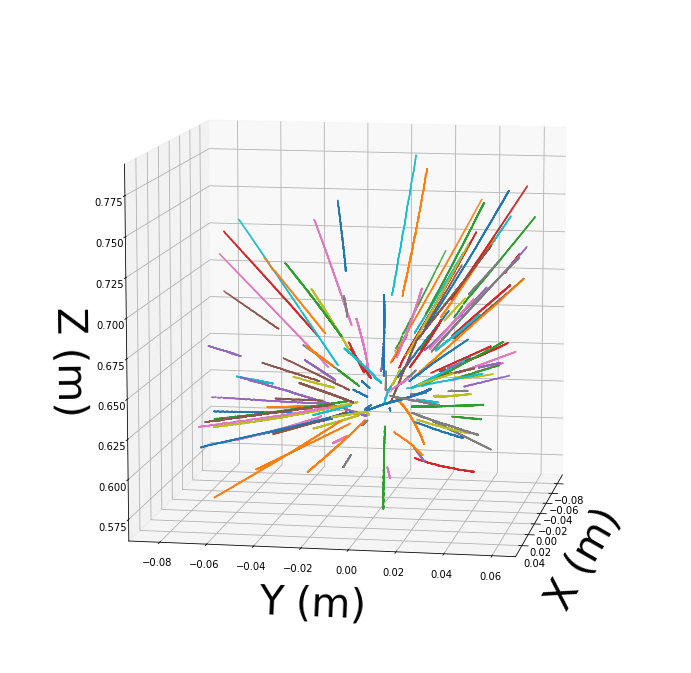

In [9]:
FitList= []
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')
#ax = fig.add_subplot(111, projection='3d')
list = pd.read_csv('./Data/Shot{}/3D/list.csv'.format(shot),header=None)
list.columns = ['TrackL','TrackR']
for it in range(len(list['TrackL'])):
    itL = list['TrackL'].iloc[it]
    itR = list['TrackR'].iloc[it]
    print(itL,itR)
    file = "./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair{}_{}.csv".format(shot,shot,itL,itR)
    df = pd.read_csv(file)
    Track2D = pd.read_csv('./Data/Shot{}/TrackPair/Pair_{}_{}.csv'.format(shot,itL,itR))
    Track2D = Track2D[:-1]
    Track2D['InvFrame']=totalframe-Track2D['Frame']    
    Track3D = pd.concat([df, Track2D['InvFrame']], axis=1)
    Track3D['Time']=Track3D['InvFrame']*DeltaT
    XL=Track3D['Left xx']
    YL=Track3D['Left yy']
    XR=Track3D['Right xx']
    YR=Track3D['Right yy']
    X=Track3D['3Dxx']
    Y=Track3D['3Dyy']
    Z=Track3D['3Dzz']
    T=Track3D['Time']   
    params_x, pcov_x = curve_fit(Parabola, T, X)
    params_y, pcov_y = curve_fit(Parabola, T, Y)
    params_z, pcov_z = curve_fit(Parabola, T, Z)
    para_list = np.concatenate((params_x,params_y,params_z), axis=0)
    para_list = [shot,itL,itR,params_x[0],params_x[1],params_x[2],params_y[0],params_y[1],params_y[2],params_z[0],params_z[1],params_z[2],
                 pcov_x[0][0],pcov_x[0][1],pcov_x[0][2], pcov_x[1][0],pcov_x[1][1],pcov_x[1][2],pcov_x[2][0],pcov_x[2][1],pcov_x[2][2],
                 pcov_y[0][0],pcov_y[0][1],pcov_y[0][2], pcov_y[1][0],pcov_y[1][1],pcov_y[1][2],pcov_y[2][0],pcov_y[2][1],pcov_y[2][2],
                 pcov_z[0][0],pcov_z[0][1],pcov_z[0][2], pcov_z[1][0],pcov_z[1][1],pcov_z[1][2],pcov_z[2][0],pcov_z[2][1],pcov_z[2][2]]
    FitList.append(para_list)
    ax.scatter(X, Y, Z, marker=".",s=1)
ax.view_init(10, 10)
ax.set_xlabel('X (m)', fontsize=40,labelpad=20)
ax.set_ylabel('Y (m)', fontsize=40,labelpad=20)
ax.set_zlabel('Z (m)', fontsize=40,labelpad=20)   
#plt.savefig("./3DFit_{}.pdf".format(shot))
plt.show()

In [10]:
P1 = pd.DataFrame(FitList)
P1.columns = ['SHOT','PIDL','PIDR','Px0','Px1','Px2','Py0','Py1','Py2','Pz0','Pz1','Pz2',
              'CovX00','CovX01','CovX02','CovX10','CovX11','CovX12','CovX20','CovX21','CovX22',
              'CovY00','CovY01','CovY02','CovY10','CovY11','CovY12','CovY20','CovY21','CovY22',
              'CovZ00','CovZ01','CovZ02','CovZ10','CovZ11','CovZ12','CovZ20','CovZ21','CovZ22'
             ]
#Calculate the total acceleration = sqrt(sum (p_i,2*2)^2); i=x,y,z
P1['A'] = np.sqrt(P1['Px2']*P1['Px2']*4+P1['Py2']*P1['Py2']*4+P1['Pz2']*P1['Pz2']*4)
P1['AUnc'] = np.sqrt((4*P1['Px2']/P1['A']*P1['CovX22'])*(4*P1['Px2']/P1['A']*P1['CovX22'])+
                     (4*P1['Py2']/P1['A']*P1['CovY22'])*(4*P1['Py2']/P1['A']*P1['CovY22'])+
                     (4*P1['Pz2']/P1['A']*P1['CovZ22'])*(4*P1['Pz2']/P1['A']*P1['CovZ22']))
#P1.to_csv("./Data/Shot{}/3DFitList_{}.csv".format(shot,shot))

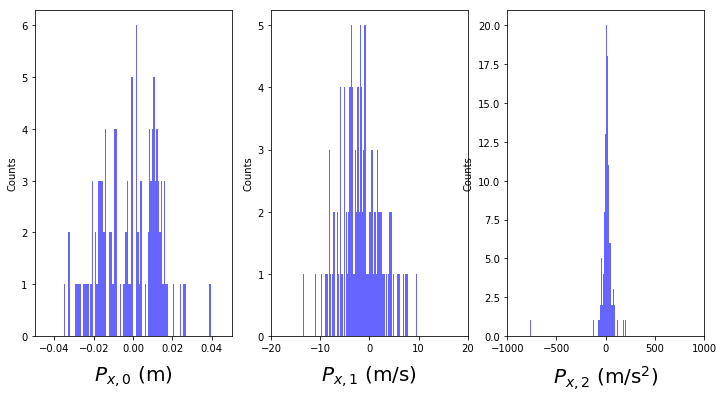

In [21]:

# Fit a normal distribution to the data of the p2 in the x-axis:
#mu, std = stats.norm.fit(P1['Px2'])
#plt.hist(P1['Px2'], bins=50, normed=True, alpha=0.6, color='b')
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#p = stats.norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
#plt.xlabel('px,2')
#plt.show()|
#print(mu,std)
#plt.hist(P1['Px0'],bins=50, normed=True, alpha=0.6, color='b')
#plt.xlabel('px,0');
#plt.show()
#plt.hist(P1['Px1'],bins=50, normed=True, alpha=0.6, color='b')
#plt.xlabel('px,1');
#plt.show()
fig = plt.figure(figsize = (12,6))  # make a new figure
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(P1['Px0'], bins=100, normed=0, alpha=0.6, color='b')
ax1.set_xlim(-0.05,0.05)
ax1.set_xlabel(r'$P_{x,0}$ (m)', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(P1['Px1'], bins=100, normed=0, alpha=0.6, color='b')
ax2.set_xlim(-20,20)
ax2.set_xlabel(r'$P_{x,1}$ (m/s)', fontsize=20,labelpad=10)
ax2.set_ylabel('Counts')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(P1['Px2'], bins=100, normed=0, alpha=0.6, color='b')
ax3.set_xlim(-1000,1000)
ax3.set_xlabel(r'$P_{x,2}$ (m/s$^2$)', fontsize=20,labelpad=10)
ax3.set_ylabel('Counts')
plt.savefig("3DFitStatX_Shot{}.pdf".format(shot))
plt.show()

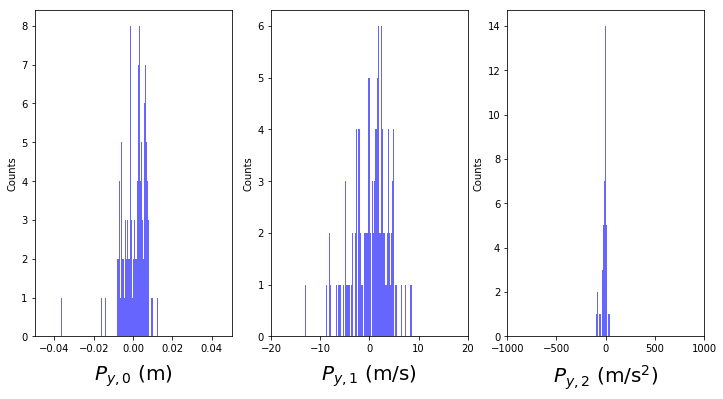

In [20]:
# Fit a normal distribution to the data of the p2 in the y-axis:
'''
mu, std = stats.norm.fit(P1['Py2'])
plt.hist(P1['Py2'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('py,2')
plt.show()
print(mu,std)
plt.hist(P1['Py0'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('py,0');
plt.show()
plt.hist(P1['Py1'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('py,1');
plt.show()
'''
fig = plt.figure(figsize = (12,6))  # make a new figure
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(P1['Py0'], bins=100, normed=0, alpha=0.6, color='b')
ax1.set_xlim(-0.05,0.05)
ax1.set_xlabel(r'$P_{y,0}$ (m)', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(P1['Py1'], bins=100, normed=0, alpha=0.6, color='b')
ax2.set_xlim(-20,20)
ax2.set_xlabel(r'$P_{y,1}$ (m/s)', fontsize=20,labelpad=10)
ax2.set_ylabel('Counts')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(P1['Py2'], bins=100, normed=0, alpha=0.6, color='b')
ax3.set_xlim(-1000,1000)
ax3.set_xlabel(r'$P_{y,2}$ (m/s$^2$)', fontsize=20,labelpad=10)
ax3.set_ylabel('Counts')
plt.savefig("3DFitStatY_Shot{}.pdf".format(shot))
plt.show()

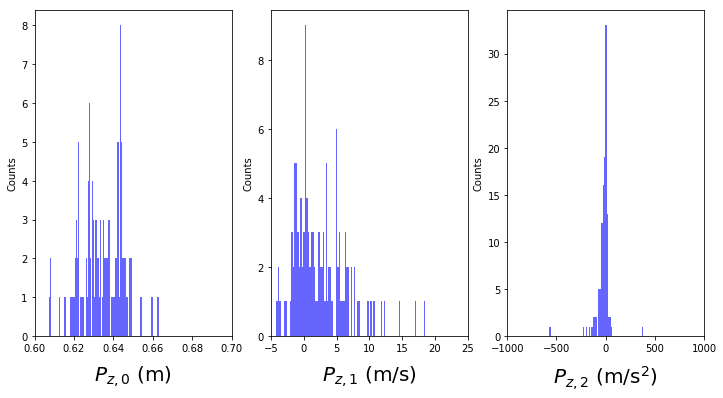

In [19]:
# Fit a normal distribution to the data of the p2 in the z-axis:
'''
mu, std = stats.norm.fit(P1['Pz2'])
plt.hist(P1['Pz2'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('pz,2')
plt.show()
print(mu,std)
plt.hist(P1['Pz0'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('pz,0');
plt.show()
plt.hist(P1['Pz1'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('pz,1');
plt.show()
'''
fig = plt.figure(figsize = (12,6))  # make a new figure
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(P1['Pz0'], bins=100, normed=0, alpha=0.6, color='b')
ax1.set_xlim(0.6,0.7)
ax1.set_xlabel(r'$P_{z,0}$ (m)', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(P1['Pz1'], bins=100, normed=0, alpha=0.6, color='b')
ax2.set_xlim(-5,25)
ax2.set_xlabel(r'$P_{z,1}$ (m/s)', fontsize=20,labelpad=10)
ax2.set_ylabel('Counts')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(P1['Pz2'], bins=100, normed=0, alpha=0.6, color='b')
ax3.set_xlim(-1000,1000)
ax3.set_xlabel(r'$P_{z,2}$ (m/s$^2$)', fontsize=20,labelpad=10)
ax3.set_ylabel('Counts')
plt.savefig("3DFitStatZ_Shot{}.pdf".format(shot))
plt.show()

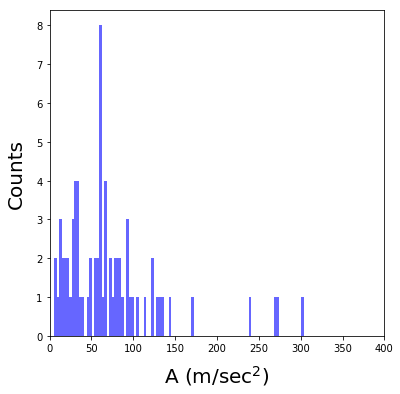

In [16]:
#P2 = P1[P1['A']<100]#Make a cut to remove outliner
#mu, std = stats.norm.fit(P1['A'])
fig = plt.figure(figsize = (6,6))  # make a new figure
P2 = P1[P1['AUnc']<2]
#mu, std = stats.norm.fit(P2['A'])
plt.hist(P2['A'], bins=100, normed=0, alpha=0.6, color='b')
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#x=np.linspace(0,100,100)
#p = stats.norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
plt.xlim(0,400)
plt.xlabel('A (m/sec$^2$)', fontsize=20,labelpad=10)
plt.ylabel('Counts', fontsize=20,labelpad=10)
#print(mu,std)
plt.savefig("3DFitStatAll_Shot{}.pdf".format(shot))
plt.show()

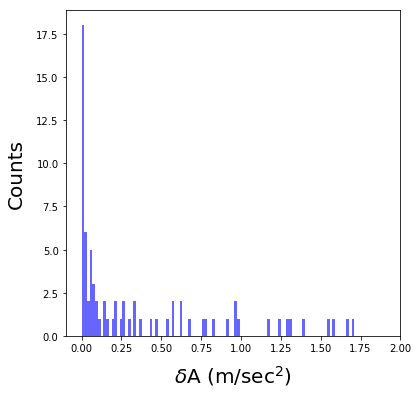

In [17]:
#P2 = P1[P1['A']<100]#Make a cut to remove outliner
#mu, std = stats.norm.fit(P1['A'])
fig = plt.figure(figsize = (6,6))  # make a new figure
plt.hist(P2['AUnc'], bins=100, normed=0, alpha=0.6, color='b')
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#x=np.linspace(0,100,100)
#p = stats.norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
plt.xlim(-0.1,2)
plt.xlabel('$\delta$A (m/sec$^2$)', fontsize=20,labelpad=10)
plt.ylabel('Counts', fontsize=20,labelpad=10)
plt.savefig("3DFitStatAllUnc_Shot{}.pdf".format(shot))
plt.show()